In [1]:
# ==================================
# Experiment 1
# ==================================

# demonstration to find the maximal l_p ball at a point x_0, within which,
# the class label of a random classifier is equal to C(x_0).

In [2]:
import sys

In [3]:
# =====================
# Imports
# =====================

from geocert import compute_boundary_batch, batch_GeoCert, incremental_GeoCert
from plnn import PLNN
from _polytope_ import Polytope, from_polytope_dict
import utilities as utils
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
# from convex_adversarial import robust_loss


/Users/jordanm/.virtualenvs/myvenv/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


===============Initializing Network============
Sequential(
  (1): Linear(in_features=2, out_features=8, bias=True)
  (2): ReLU()
  (3): Linear(in_features=8, out_features=8, bias=True)
  (4): ReLU()
  (5): Linear(in_features=8, out_features=2, bias=True)
)
===============Finding Projection============
lp_norm:  l_2
from point: 
tensor([[0.],
        [0.]])
/Users/jordanm/grad/geometric-certificates
---Initial Polytope---
num facets:  4
---Opening New Polytope---


/Users/jordanm/.virtualenvs/myvenv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:1262: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  OptimizeWarning)
/Users/jordanm/.virtualenvs/myvenv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:1274: OptimizeWarning: Solving system with option 'sym_pos':False failed. This may happen occasionally, especially as the solution is approached. However, if you see this frequently, your problem may be numerically challenging. If you cannot improve the formulation, consider setting 'lstsq' to True. Consider also setting `presolve` to True, if it is not already.
  OptimizeWarning)
/Users/jordanm/.virtualenvs/myvenv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:1048: RuntimeWarning: internal gelsd driver lwork query error, required iwor

num facets:  4


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jordanm/grad/geometric-certificates/plots/incremental_geocert/0.png'

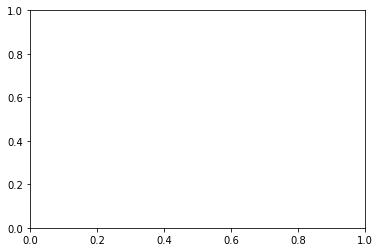

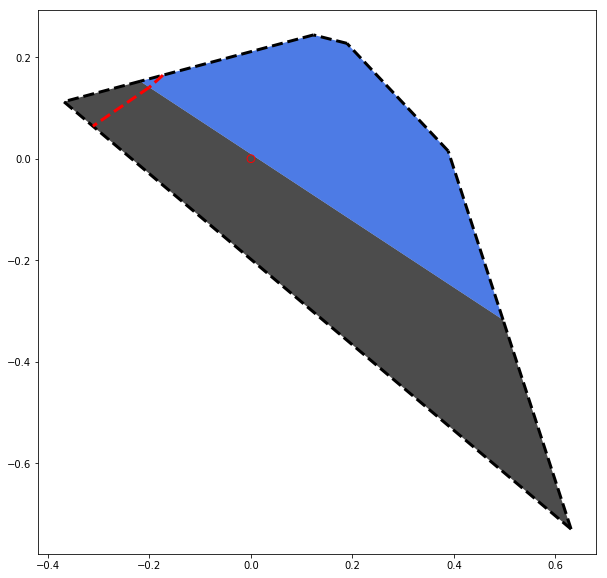

In [4]:
# Fun incremental 'GeoCert' from the point [0,0]. Network is simple ReLu net with
# Gaussian random weights. Finds maximal l_p ball within which the class label
# remains the same.


# ==================================
# Initialize Network
# ==================================

print('===============Initializing Network============')
layer_sizes = [2, 8, 8, 2]
network = PLNN(layer_sizes)

# ==================================
# Find Projection
# ==================================

lp_norm = 'l_2'

print('===============Finding Projection============')
print('lp_norm: ', lp_norm)
x_0 = torch.Tensor([[0.0], [0.0]])
print('from point: ')
print(x_0)

ax = plt.axes()
cwd = os.getcwd()
print(cwd)
plot_dir = cwd + '/plots/incremental_geocert/'

t = incremental_GeoCert(lp_norm, network, x_0, ax, plot_dir)

In [ ]:
print('plots can be found at:', plot_dir)
print('the final projection value:', t)